# Analysis of spiking model
## Implemented (with slight variations) as repoted in Litwin-Kumar & Doiron, 2012

#### Taku Ito
#### 07/09/2019

In [1]:
import numpy as np
import model_nomatmul as model
from importlib import reload
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.signal import convolve2d
%matplotlib inline
import numpy.matlib as matlib
from statsmodels.distributions.empirical_distribution import ECDF
import time as timepkg

#### Construct model, set parameters and synaptic efficacies

In [3]:
model = reload(model)

# Dynamic parameters
tau_e  = 15.0
tau_i = 10.0
ref_e = 5.0
ref_i = 5.0


# Construct network and synaptic connections
nE = int(4000)
nI = int(1000)
n_clusters = 50
# Connectivity probabilities
pEE = .2
pEI = .5 
pIE = .5
pII = .5
rEE = 2.5 # Clustering coef
K = nE*pEE # Average number of E-E connections
# Synaptic efficacies
jEE_out = 10.0 / (tau_e * np.sqrt(K))
jEE_in = 1.9 * 10.0 / (tau_e * np.sqrt(K))
jEI = 4.0 / (np.sqrt(K) * tau_i)
jIE = -16.0 * 1.2 / (tau_e * np.sqrt(K))
jII = -16.0 / (tau_i * np.sqrt(K))

W = model.constructConnMatrices(nE=nE, nI=nI, n_clusters=n_clusters,
                                                 pEE=pEE, pEI=pEI, pIE=pIE, pII=pII, rEE=rEE, 
                                                 jEE_out=jEE_out, jEE_in=jEE_in, jEI=jEI, jIE=jIE, jII=jII)

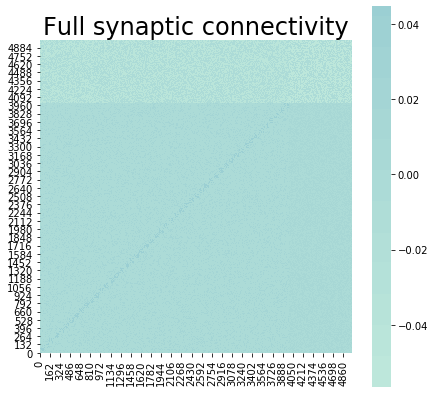

In [5]:
plt.figure(figsize=(7,7))
mat2 = W
ax = sns.heatmap(mat2,square=True,center=True, cbar={'frac':0.046});
ax.invert_yaxis();
plt.title('Full synaptic connectivity', fontsize=24);

#### Simulate spiking model

In [44]:
model = reload(model)

timestart=timepkg.time()
time = 2000
dt = .1
T = np.arange(0,time,dt)

stim_e = np.zeros((nE,))
stim_i = np.zeros((nI,))
out = model.spikingModel(nE, nI, W, stim_e, stim_i,
                         time=2000, dt=dt)
spktimes, ns, Ne, Ncells, T = out
timeend = timepkg.time()
print('Elapsed time:', timeend-timestart)

Starting simulation
 0.0
 1.0
 2.0
 3.0
 4.0
 5.0
 6.0
 7.0
 8.0
 9.0
 10.0
 11.0
 12.0
 13.0
 14.0
 15.0
 16.0
 17.0
 18.0
 19.0
 20.0
 21.0
 22.0
 23.0
 24.0
 25.0
 26.0
 27.0
 28.0
 29.0
 30.0
 31.0
 32.0
 33.0
 34.0
 35.0
 36.0
 37.0
 38.0
 39.0
 40.0
 41.0
 42.0
 43.0
 44.0
 45.0
 46.0
 47.0
 48.0
 49.0
 50.0
 51.0
 52.0
 53.0
 54.0
 55.0
 56.0
 57.0
 58.0
 59.0
 60.0
 61.0
 62.0
 63.0
 64.0
 65.0
 66.0
 67.0
 68.0
 69.0
 70.0
 71.0
 72.0
 73.0
 74.0
 75.0
 76.0
 77.0
 78.0
 79.0
 80.0
 81.0
 82.0
 83.0
 84.0
 85.0
 86.0
 87.0
 88.0
 89.0
 90.0
 91.0
 92.0
 93.0
 94.0
 95.0
 96.0
 97.0
 98.0
 99.0
Elapsed time: 1078.2540256977081


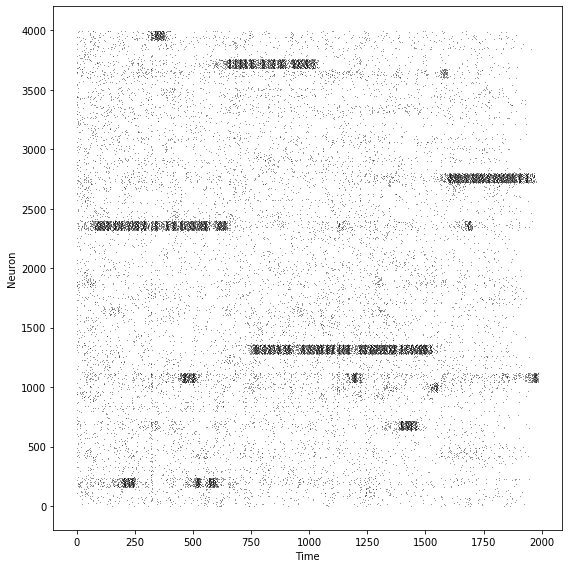

In [45]:

plt.figure(figsize=(8,8))
for ci in range(nE):
    vals = spktimes[ci,1:ns[ci]]
    y = ci*np.ones((len(vals),))
    plt.scatter(vals,y,s=.3,c="k",marker="o",linewidths=0)

plt.ylabel("Neuron")
plt.xlabel("Time")
plt.tight_layout()
# plt.savefig("imshow.png",dpi=150)

# Run with stimulation in first two clusters

In [13]:
model = reload(model)

timestart = timepkg.time()
time = 2000
dt = .1
T = np.arange(0,time,dt)

stim_e = np.zeros((nE,))
stim_i = np.zeros((nI,))
stim_e[:n_clusters*2] = 0.07
out = model.spikingModel(wEE, wEI, wIE, wII, stim_e, stim_i,
                         time=time, dt=dt)
spkE_stim, spkI_stim, Ie_stim, Ii_stim = out
timeend = timepkg.time()
print('Elapsed time:', timeend-timestart)


ValueError: too many values to unpack (expected 4)

In [ ]:
plt.figure(figsize=(7,7))
plt.title('E-pop',size=24)
plt.imshow(spkE_stim[:,:],aspect='auto', origin='lower', cmap='binary')
plt.xlabel('Time (ms)',size=18)
plt.xticks(np.arange(0,len(T),1000),T[np.arange(0,len(T),1000)])
plt.ylabel('Neuron',size=18)

plt.figure(figsize=(7,7))
plt.title('I-pop',size=24)
plt.imshow(spkI_stim[:,:],aspect='auto', origin='lower', cmap='binary')
plt.xlabel('Time (ms)',size=18)
plt.xticks(np.arange(0,len(T),1000),T[np.arange(0,len(T),1000)])
plt.ylabel('Neuron',size=18)

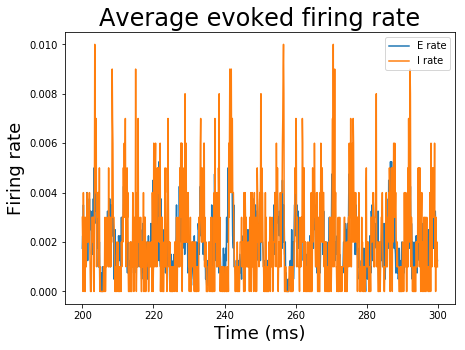

In [655]:
timestart = 2000
timeend = 3000
plt.figure(figsize=(7,5))
plt.title('Average evoked firing rate',fontsize=24)
plt.plot(T[timestart:timeend],np.mean(spkE_stim[:,timestart:timeend],axis=0),label='E rate')
plt.plot(T[timestart:timeend],np.mean(spkI_stim[:,timestart:timeend],axis=0),label='I rate')
plt.xlabel('Time (ms)',fontsize=18)
plt.ylabel('Firing rate',fontsize=18)
plt.legend()


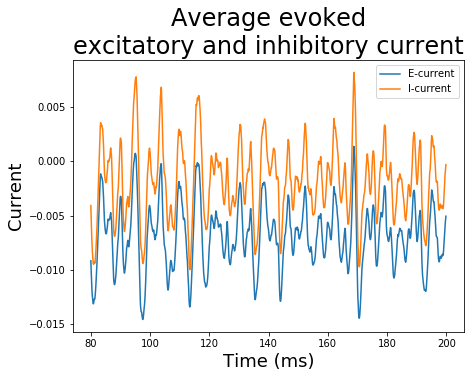

In [656]:
timestart = 800
timeend = 2000

plt.figure(figsize=(7,5))
plt.title('Average evoked\nexcitatory and inhibitory current',fontsize=24)
plt.plot(T[timestart:timeend],np.mean(Ie_stim[:,timestart:timeend],axis=0),label='E-current');
plt.plot(T[timestart:timeend],np.mean(Ii_stim[:,timestart:timeend],axis=0),label='I-current');
plt.xlabel('Time (ms)',fontsize=18)
plt.ylabel('Current',fontsize=18)
plt.legend()

# Plot excitatory mean firing rate vs. excitatory mean input

Text(0, 0.5, 'E firing rate')

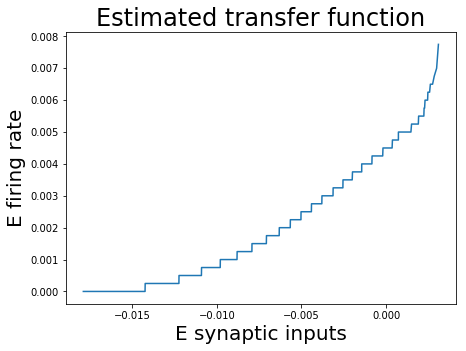

In [657]:
synE_spont_mean = np.mean(Ie_spont,axis=0)
frE_spont_mean = np.mean(spkE_spont,axis=0)

synE_stim_mean = np.mean(Ie_stim,axis=0)
frE_stim_mean = np.mean(spkE_stim,axis=0)

synE_mean = np.hstack((synE_spont_mean,synE_stim_mean))
frE_mean = np.hstack((frE_spont_mean,frE_stim_mean))

# Sort inputs
input_ind_sorted = sorted(range(len(synE_mean)), key=lambda k: synE_mean[k])

plt.figure(figsize=(7,5))
plt.title('Estimated transfer function', fontsize=24)
# plt.plot(synE_mean[input_ind_sorted],frE_mean[input_ind_sorted])
plt.plot(np.sort(synE_mean),np.sort(frE_mean))
plt.xlabel('E synaptic inputs',fontsize=20)
plt.ylabel('E firing rate',fontsize=20)


Text(0.5, 1.0, 'Distribution of firing rate')

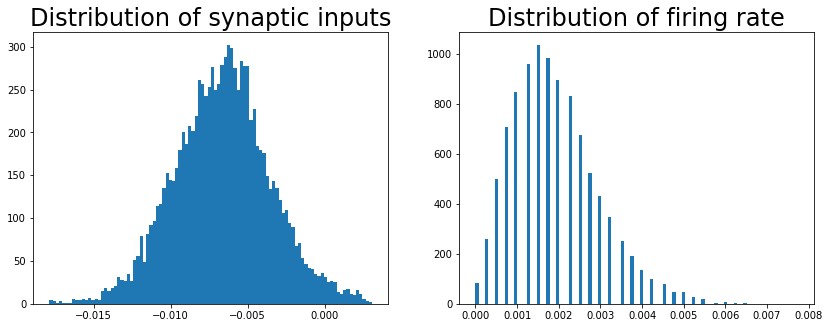

In [658]:
plt.figure(figsize=(14,5))
plt.subplot(121)
plt.hist(synE_mean,bins=100);
plt.title('Distribution of synaptic inputs', fontsize=24)

plt.subplot(122)
plt.hist(frE_mean,bins=100);
plt.title('Distribution of firing rate', fontsize=24)


In [671]:
jIE/0.09050967

-0.4999999889065891

In [672]:
wIE

array([[-0.04525483, -0.        , -0.04525483, ..., -0.        ,
        -0.        , -0.04525483],
       [-0.        , -0.04525483, -0.        , ..., -0.        ,
        -0.04525483, -0.        ],
       [-0.        , -0.04525483, -0.04525483, ..., -0.        ,
        -0.04525483, -0.04525483],
       ...,
       [-0.        , -0.04525483, -0.04525483, ..., -0.04525483,
        -0.        , -0.        ],
       [-0.04525483, -0.04525483, -0.04525483, ..., -0.04525483,
        -0.        , -0.        ],
       [-0.04525483, -0.        , -0.        , ..., -0.        ,
        -0.        , -0.04525483]])

In [670]:
np.matmul(spkI[:,2000],wIE)

array([-0.09050967,  0.        , -0.04525483, ..., -0.04525483,
       -0.04525483, -0.09050967])

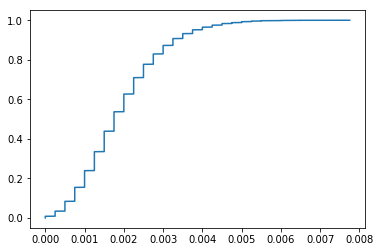

In [660]:
frE_ind_sorted = sorted(range(len(frE_mean)), key=lambda k: frE_mean[k])

ecdf_frE = ECDF(frE_mean)
# plt.plot(ecdf.x,ecdf.y)
plt.plot(ecdf_frE.x,ecdf_frE.y)

___

#### John Murray's approach

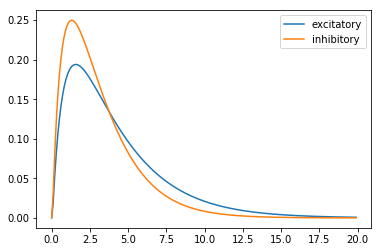

In [328]:
dt = 0.1
syntau1 = 1.0
syntau2_e = 3.0
syntau2_i = 2.0
T = np.arange(0,20,.1)
Ie = np.zeros((1,len(T)))
Xe = np.zeros((1,len(T)))
Ii = np.zeros((1,len(T)))
Xi = np.zeros((1,len(T)))

alphax_e = 2
alphas_e = 2

alphax_i = 2.5
alphas_i = 2.5

spikes = np.zeros((1,len(T)))
spikes[0,0]=1
for t in range(len(T)-1):
    k1xe = alphax_e * spikes[0,t] - Xe[0,t]/syntau2_e
    k1xi = alphax_i * spikes[0,t] - Xi[0,t]/syntau2_i
    
    k1Ie = alphas_e * Xe[0,t] * (1.0 - Ie[0,t]) - Ie[0,t]/syntau1
    k1Ii = alphas_i * Xi[0,t] * (1.0 - Ii[0,t]) - Ii[0,t]/syntau1
    
    aXe = Xe[:,t] + k1xe*dt
    aXi = Xi[:,t] + k1xi*dt
    aIe = Ie[:,t] + k1Ie*dt
    aIi = Ii[:,t] + k1Ii*dt
    
    k2xe = alphax_e * spikes[0,t] - aXe/syntau2_e
    k2xi = alphax_i * spikes[0,t] - aXi/syntau2_i
    
    k2Ie = alphas_e * aXe * (1.0 - aIe) - aIe/syntau1
    k2Ii = alphas_i * aXi * (1.0 - aIi) - aIi/syntau1
    
    Xe[:,t+1] = Xe[:,t] + (k1xe+k2xe)*dt/2.0
    Xi[:,t+1] = Xi[:,t] + (k1xi+k2xi)*dt/2.0
    Ie[:,t+1] = Ie[:,t] + (k1Ie+k2Ie)*dt/2.0
    Ii[:,t+1] = Ii[:,t] + (k1Ii+k2Ii)*dt/2.0

plt.plot(T,Ie.T,label='excitatory')
plt.plot(T,Ii.T,label='inhibitory')
plt.legend()

In [185]:
import scipy.stats as stats

In [188]:
stats.pearsonr(syn_func_i(t),Ii[0,:])

(0.999276032728544, 4.48691782551652e-283)

In [183]:
np.max(syn_func_e(t))

0.19237485075768823

In [182]:
np.max(Ie)

0.19388367359802364

___

In [84]:
matlib.repmat(t,10,1).shape

(10, 200)

In [101]:
a = np.random.binomial(1,.5,size=(10,100)) 

In [94]:
conv = np.convolve(syn_func_e(t),1)
filter2d = matlib.repmat(conv,a.shape[0],1)

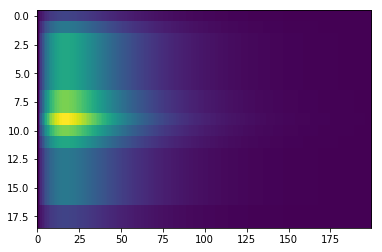

In [102]:
plt.imshow(convolve2d(a[:,0:1],filter2d),aspect='auto')

In [ ]:
tmp = convolve2d(a[:,0:1],filter2d)

In [135]:
tmp = syn_func_e(t)

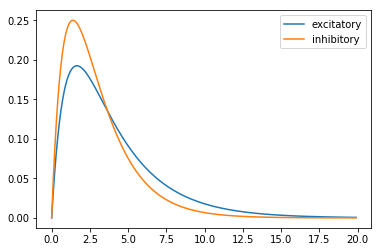

In [464]:
t = np.arange(0,20,.1)

syn_func_e = lambda t: (1.0/(syntau2_e-syntau1))*(np.exp(-t/syntau2_e)-np.exp(-t/syntau1))
syn_func_i = lambda t: (1.0/(syntau2_i-syntau1))*(np.exp(-t/syntau2_i)-np.exp(-t/syntau1))
plt.plot(t,syn_func_e(t),label='excitatory')
plt.plot(t,syn_func_i(t),label='inhibitory')
plt.legend()

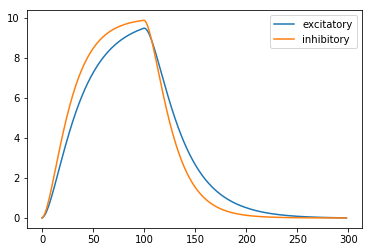

In [292]:
t = np.arange(0,20,.1)

syn_func_e = lambda t: (1.0/(syntau2_e-syntau1))*(np.exp(-t/syntau2_e)-np.exp(-t/syntau1))
syn_func_i = lambda t: (1.0/(syntau2_i-syntau1))*(np.exp(-t/syntau2_i)-np.exp(-t/syntau1))

synE_filter = syn_func_e(t)
synI_filter = syn_func_i(t)

spikesE = np.ones((100,))
spikesI = np.ones((100,))

synE = np.convolve(spikesE, synE_filter)
synI = np.convolve(spikesI, synI_filter)

plt.plot(synE,label='excitatory')
plt.plot(synI,label='inhibitory')
plt.legend()

___

# From Litwin-Kumar code

In [ ]:
xerise[ci] += -dt*xerise[ci]/tauerise + forwardInputsEPrev[ci]
xedecay[ci] += -dt*xedecay[ci]/tauedecay + forwardInputsEPrev[ci]
xirise[ci] += -dt*xirise[ci]/tauirise + forwardInputsIPrev[ci]
xidecay[ci] += -dt*xidecay[ci]/tauidecay + forwardInputsIPrev[ci]

synInput = (xedecay[ci] - xerise[ci])/(tauedecay - tauerise) + (xidecay[ci] - xirise[ci])/(tauidecay - tauirise)


In [1]:
dt = 0.1
syntau1 = 1.0
syntau2_e = 3.0
syntau2_i = 8.0
T = np.arange(0,20,.1)
Ie = np.zeros((1,len(T)))
Ii = np.zeros((1,len(T)))

xerise = np.zeros((1,len(T)))
xedecay = np.zeros((1,len(T)))
xirise = np.zeros((1,len(T)))
xidecay = np.zeros((1,len(T)))

# alphax_e = 2
# alphas_e = 2

# alphax_i = 2.5
# alphas_i = 2.5

spikes = np.zeros((1,len(T)))
spikes[0,0]=10
for t in range(len(T)-1):
    # K1
    k1xerise = -xerise[:,t]/syntau1 + spikes[0,t]
    k1xedecay = -xedecay[:,t]/syntau2_e + spikes[0,t]

    k1xirise = -xirise[:,t]/syntau1 + spikes[0,t]
    k1xidecay = -xidecay[:,t]/syntau2_i + spikes[0,t]
    
    # Midpoint
    a_xerise = xerise[:,t] + k1xerise*dt
    a_xedecay = xedecay[:,t] + k1xedecay*dt
    a_xirise = xirise[:,t] + k1xirise*dt
    a_xidecay = xidecay[:,t] + k1xidecay*dt
    
    # K2
    k2xerise = -a_xerise/syntau1 + spikes[0,t]
    k2xedecay = -a_xedecay/syntau2_e + spikes[0,t]

    k2xirise = -a_xirise/syntau1 + spikes[0,t]
    k2xidecay = -a_xidecay/syntau2_i + spikes[0,t]
 
    # RK2
    xerise[:,t+1] = xerise[:,t] + (k1xerise+k2xerise)*dt/2.0
    xedecay[:,t+1] = xedecay[:,t] + (k1xedecay+k2xedecay)*dt/2.0
    #
    xirise[:,t+1] = xirise[:,t] + (k1xirise+k2xirise)*dt/2.0
    xidecay[:,t+1] = xidecay[:,t] + (k1xidecay+k2xidecay)*dt/2.0
    
    Ie[:,t+1] = (xedecay[:,t+1]-xerise[:,t+1])/(syntau2_e - syntau1)
    Ii[:,t+1] = (xidecay[:,t+1]-xirise[:,t+1])/(syntau2_i - syntau1)
    

# xerise[ci] += -dt*xerise[ci]/tauerise + forwardInputsEPrev[ci]
# xedecay[ci] += -dt*xedecay[ci]/tauedecay + forwardInputsEPrev[ci]
# xirise[ci] += -dt*xirise[ci]/tauirise + forwardInputsIPrev[ci]
# xidecay[ci] += -dt*xidecay[ci]/tauidecay + forwardInputsIPrev[ci]

# synInput = (xedecay[ci] - xerise[ci])/(tauedecay - tauerise) + (xidecay[ci] - xirise[ci])/(tauidecay - tauirise)


plt.plot(T,Ie.T,label='excitatory')
plt.plot(T,Ii.T,label='inhibitory')
plt.legend()

NameError: name 'np' is not defined